In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
from HillClimber import SimulatedAnnealing
from HillClimber import HillClimber
from charge_collection import ChargeCollection
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loop through simulated annealing function to produce multiple simulations
# Simulations of the same parameters were saved to the same file
# N_arr = range(8,20,4)
N_arr=[30,15]
chain = [400]

for n in N_arr:
    for c in chain:
        for i in range(10):
            cooling=0.3
            iterations  =int(50*c)
            random_charges = ChargeCollection(n)
            simulated_annealing = SimulatedAnnealing(random_charges,max_stepsize = 0.5, cooling_rate=cooling,chain_length=c)
            simulated_annealing.run(iterations,verbose=True, animate=False, save=True)

            # save image if needed
            simulated_annealing.charges.plot_charges(random_charges)
            plt.axis('off')
            plt.savefig('N{} I{} c{} chain{}.png'.format(n,iterations,cooling,c))
            plt.show()
        

500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_10.csv
1500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_30.csv
2500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_50.csv
3500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_70.csv
4500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_90.csv


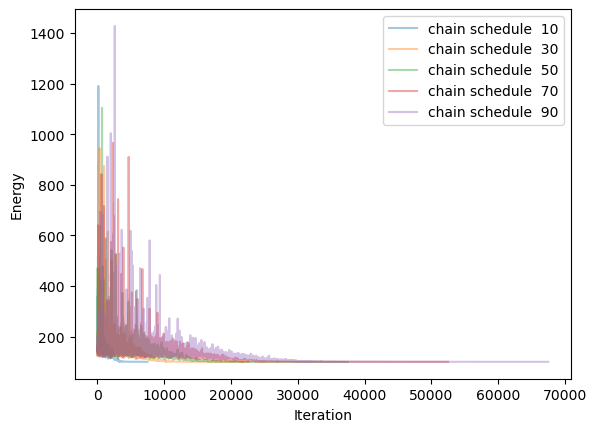

In [26]:
# Iteration and energy

files = os.listdir('data')

for file in ['500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_10.csv',
'1500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_30.csv',
'2500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_50.csv',
'3500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_70.csv',
'4500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_90.csv',
]:
    if ('_15_' in file)&('chain' in file):

        df = pd.read_csv(os.path.join('data',file))
        file = file.replace(".csv","").replace(" - Copy","")
        params = file.split('_')
        chain = params[-1]

        if chain == 'linear':
            plt.plot(df.index,df["# energy"],label = "chain schedule  {}".format(chain),alpha=0.2,c='grey')
        else:
            plt.plot(df.index,df["# energy"],label = "chain schedule  {}".format(chain),alpha=0.4)
plt.legend(loc='best')
plt.xlabel('Iteration')
plt.ylabel('Energy')

plt.savefig('N11 chain rate changes single sim.png')
plt.show()

500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_10.csv
2500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_50.csv
5000_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_100.csv
10000_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_200.csv
20000_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_400.csv


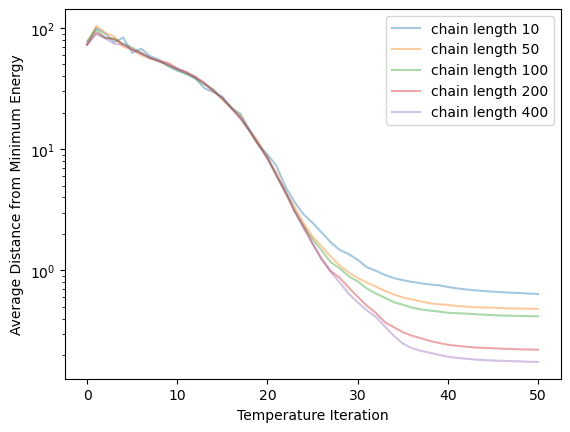

In [54]:
files = os.listdir('data')

for file in [
    '500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_10.csv',
# '1500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_30.csv'
'2500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_50.csv',
# '3500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_70.csv'
# '4500_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_90.csv'
'5000_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_100.csv',
'10000_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_200.csv',
'20000_N_15_iters_max_step_0.5_T0_1000_cooling_0.7_chain_400.csv'
]:

    if ('_15_' in file)&('chain' in file):
        print(file)
        min_15 = 100.25349

        df = pd.read_csv(os.path.join('data',file))
        file = file.replace(".csv","").replace(" - Copy","")
        params = file.split('_')
        chain = params[-1]
        # print(min(df['# energy']))

        df_g = df.groupby(' temperature',as_index=False).agg({'# energy':'mean'})

        plt.plot(df_g.index,df_g["# energy"][::-1]-min_15,label = "chain length {}".format(chain),alpha=0.4)
plt.legend(loc='upper right')
plt.xlabel('Temperature Iteration')
plt.ylabel('Average Distance from Minimum Energy')
plt.yscale('log',base=10)
# plt.ylim(0,200)
# plt.xlim(0,210)
plt.savefig('N15 markov chain convergence.png')
plt.show()

480.0814129127705
479.4408168162474
479.257244657492
479.195035815702
479.1563466487647


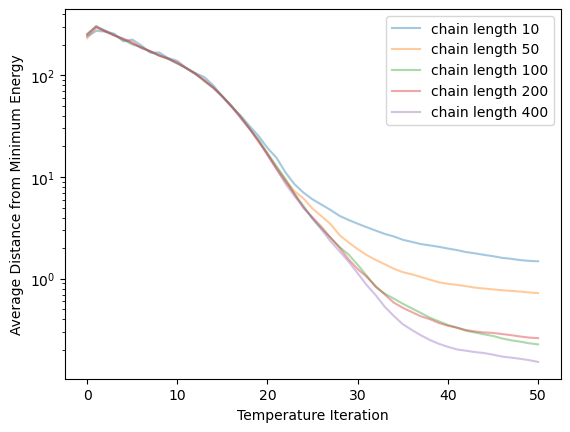

In [56]:
files = os.listdir('data')

for file in[
    '500_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_10.csv',
# '1500_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_30.csv'
'2500_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_50.csv',
# '3500_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_70.csv'
# '4500_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_90.csv'
'5000_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_100.csv',
'10000_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_200.csv',
'20000_N_30_iters_max_step_0.5_T0_1000_cooling_0.7_chain_400.csv'
]:
    if ('_30_' in file)&('chain' in file):
        min_30 = 479.15

        df = pd.read_csv(os.path.join('data',file))
        file = file.replace(".csv","").replace(" - Copy","")
        params = file.split('_')
        chain = params[-1]
        print(min(df['# energy']))

        df_g = df.groupby(' temperature',as_index=False).agg({'# energy':'mean'})

        plt.plot(df_g.index,df_g["# energy"][::-1]-min_30,label = "chain length {}".format(chain),alpha=0.4)
plt.legend(loc='upper right')
plt.xlabel('Temperature Iteration')
plt.ylabel('Average Distance from Minimum Energy')
plt.yscale('log',base=10)
# plt.ylim(0,200)
# plt.xlim(0,210)
plt.savefig('N30 markov chain convergence.png')
plt.show()